In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
#Importing the dataset
df = pd.read_csv("Randomforest.csv")

In [70]:
#View the dimensions
df.shape

(249, 20)

In [71]:
#top 5 rows
df.head()

,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,image_url
0,1,Kid Pasta,Indian,Lunch,Keto,737,52.4,43.9,34.3,16.8,42.9,2079,91,206,Grilled,47,56,4.4,0,https://example.com/images/meal_1.jpg
1,2,Husband Rice,Mexican,Lunch,Paleo,182,74.7,144.4,0.1,22.3,38.6,423,7,317,Roasted,51,34,2.4,0,https://example.com/images/meal_2.jpg
2,3,Activity Rice,Indian,Snack,Paleo,881,52.9,97.3,18.8,20.0,37.5,2383,209,395,Boiled,58,29,4.3,0,https://example.com/images/meal_3.jpg
3,4,Another Salad,Mexican,Snack,Keto,427,17.5,73.1,7.6,9.8,41.7,846,107,499,Grilled,14,81,4.6,0,https://example.com/images/meal_4.jpg
4,5,Quite Stew,Thai,Lunch,Vegan,210,51.6,104.3,26.3,24.8,18.2,1460,42,486,Raw,47,105,4.3,0,https://example.com/images/meal_5.jpg


In [72]:
#Drop unnecessary columns
df.drop(['meal_id','image_url','prep_time_min','cook_time_min'],axis=1,inplace=True)

In [73]:
#preview the changes
df.head()

,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,rating,is_healthy
0,Kid Pasta,Indian,Lunch,Keto,737,52.4,43.9,34.3,16.8,42.9,2079,91,206,Grilled,4.4,0
1,Husband Rice,Mexican,Lunch,Paleo,182,74.7,144.4,0.1,22.3,38.6,423,7,317,Roasted,2.4,0
2,Activity Rice,Indian,Snack,Paleo,881,52.9,97.3,18.8,20.0,37.5,2383,209,395,Boiled,4.3,0
3,Another Salad,Mexican,Snack,Keto,427,17.5,73.1,7.6,9.8,41.7,846,107,499,Grilled,4.6,0
4,Quite Stew,Thai,Lunch,Vegan,210,51.6,104.3,26.3,24.8,18.2,1460,42,486,Raw,4.3,0


In [74]:
#Summary of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   meal_name       249 non-null    object 
 1   cuisine         249 non-null    object 
 2   meal_type       249 non-null    object 
 3   diet_type       249 non-null    object 
 4   calories        249 non-null    int64  
 5   protein_g       249 non-null    float64
 6   carbs_g         249 non-null    float64
 7   fat_g           249 non-null    float64
 8   fiber_g         249 non-null    float64
 9   sugar_g         249 non-null    float64
 10  sodium_mg       249 non-null    int64  
 11  cholesterol_mg  249 non-null    int64  
 12  serving_size_g  249 non-null    int64  
 13  cooking_method  249 non-null    object 
 14  rating          249 non-null    float64
 15  is_healthy      249 non-null    int64  
dtypes: float64(6), int64(5), object(5)
memory usage: 31.3+ KB


In [75]:
#Checking the frequency of categroical variables
col_names = ['meal_name','cuisine','meal_type','diet_type']
for col in col_names:
    print(df[col].value_counts())

meal_name
Thing Rice            2
Add Wrap              2
Bill Stew             2
Challenge Sandwich    2
Husband Rice          1
                     ..
Box Sandwich          1
Choose Wrap           1
Method Stew           1
Outside Sandwich      1
Worker Stew           1
Name: count, Length: 245, dtype: int64
cuisine
Mediterranean    36
American         36
Indian           30
Mexican          30
Chinese          30
Italian          30
Japanese         30
Thai             27
Name: count, dtype: int64
meal_type
Lunch        67
Breakfast    66
Dinner       63
Snack        53
Name: count, dtype: int64
diet_type
Vegetarian    43
Low-Carb      43
Vegan         42
Balanced      41
Paleo         40
Keto          40
Name: count, dtype: int64


In [76]:
#Displaying our target variable
df['is_healthy'].value_counts()

is_healthy
0    222
1     27
Name: count, dtype: int64

In [77]:
#check missing values in varaibles
df.isnull().sum()

meal_name         0
cuisine           0
meal_type         0
diet_type         0
calories          0
protein_g         0
carbs_g           0
fat_g             0
fiber_g           0
sugar_g           0
sodium_mg         0
cholesterol_mg    0
serving_size_g    0
cooking_method    0
rating            0
is_healthy        0
dtype: int64

In [78]:
#Declaring feature vector and target variable

X = df.drop(['is_healthy'], axis = 1)

y = df['is_healthy']

In [79]:
#Splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 50)

In [80]:
#check the shape of X_train and X_test

X_train.shape, X_test.shape

((166, 15), (83, 15))

In [81]:
#Check data types in X_train

X_train.dtypes

meal_name          object
cuisine            object
meal_type          object
diet_type          object
calories            int64
protein_g         float64
carbs_g           float64
fat_g             float64
fiber_g           float64
sugar_g           float64
sodium_mg           int64
cholesterol_mg      int64
serving_size_g      int64
cooking_method     object
rating            float64
dtype: object

In [82]:
#Encoding categorical variables

X_train.head()

,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,rating
61,Heavy Stew,Italian,Dinner,Paleo,417,35.6,123.3,3.3,29.4,49.7,2341,232,469,Roasted,2.1
142,Return Curry,American,Lunch,Low-Carb,778,69.5,0.8,36.5,20.6,1.8,1460,293,419,Grilled,5.0
178,Glass Salad,Mediterranean,Dinner,Low-Carb,881,21.0,20.7,13.9,12.5,36.8,2177,282,398,Baked,4.1
100,Week Stew,Italian,Dinner,Keto,1145,15.4,55.2,51.3,27.6,19.2,1104,238,102,Boiled,4.1
186,Your Pasta,Italian,Lunch,Vegan,671,56.1,88.1,15.9,16.0,43.3,50,290,354,Grilled,2.9


In [83]:
#importing category encoders
import category_encoders as ce

In [96]:
encoder = ce.OneHotEncoder(cols = ['meal_name','cuisine','meal_type','diet_type','cooking_method'], use_cat_names=True)


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [85]:
X_train.head()

,meal_name_Heavy Stew,meal_name_Return Curry,meal_name_Glass Salad,meal_name_Week Stew,meal_name_Your Pasta,meal_name_Eight Wrap,meal_name_Decide Salad,meal_name_Pull Stew,meal_name_Clearly Salad,meal_name_Actually Rice,...,cholesterol_mg,serving_size_g,cooking_method_Roasted,cooking_method_Grilled,cooking_method_Baked,cooking_method_Boiled,cooking_method_Fried,cooking_method_Steamed,cooking_method_Raw,rating
61,1,0,0,0,0,0,0,0,0,0,...,232,469,1,0,0,0,0,0,0,2.1
142,0,1,0,0,0,0,0,0,0,0,...,293,419,0,1,0,0,0,0,0,5.0
178,0,0,1,0,0,0,0,0,0,0,...,282,398,0,0,1,0,0,0,0,4.1
100,0,0,0,1,0,0,0,0,0,0,...,238,102,0,0,0,1,0,0,0,4.1
186,0,0,0,0,1,0,0,0,0,0,...,290,354,0,1,0,0,0,0,0,2.9


In [86]:
X_test.head()

,meal_name_Heavy Stew,meal_name_Return Curry,meal_name_Glass Salad,meal_name_Week Stew,meal_name_Your Pasta,meal_name_Eight Wrap,meal_name_Decide Salad,meal_name_Pull Stew,meal_name_Clearly Salad,meal_name_Actually Rice,...,cholesterol_mg,serving_size_g,cooking_method_Roasted,cooking_method_Grilled,cooking_method_Baked,cooking_method_Boiled,cooking_method_Fried,cooking_method_Steamed,cooking_method_Raw,rating
98,0,0,0,0,0,0,0,0,0,0,...,58,112,0,0,0,1,0,0,0,3.6
16,0,0,0,0,0,0,0,0,0,0,...,136,233,0,0,0,0,0,1,0,4.2
225,0,0,0,0,0,0,0,0,0,0,...,122,307,0,0,1,0,0,0,0,3.9
20,0,0,0,0,0,0,0,0,0,0,...,281,365,0,0,0,0,0,0,1,1.7
149,0,0,0,0,0,0,0,0,0,0,...,107,306,0,1,0,0,0,0,0,4.4


In [87]:
#Now importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#making an instance of the model

rfc = RandomForestClassifier(n_estimators= 11, random_state = 0)
#Testing with 12 Decision Trees


#fit the model
rfc.fit(X_train, y_train)


#Predicting the Test set results

y_pred = rfc.predict(X_test)

#CHeck accuracy score

from sklearn.metrics import accuracy_score

print('model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

model accuracy score: 0.8916


In [88]:
#Again making the instance of model with 100 Decision Trees

rfc_100 = RandomForestClassifier(n_estimators=100, random_state = 0)

#fit the model to the training set
rfc_100.fit(X_train, y_train)

#predict the test set results
y_pred_100 = rfc_100.predict(X_test)


#Check accuracy score
print("Model accuracy score with 100 Decision Trees: {0:0.4f}".format(accuracy_score(y_test, y_pred_100 )))

Model accuracy score with 100 Decision Trees: 0.9036


In [89]:
#Create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)


#fit the model to the training set

clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [90]:
#view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores
#Highilight the important features

fat_g                         0.101446
sugar_g                       0.097955
calories                      0.082138
protein_g                     0.056256
fiber_g                       0.055527
                                ...   
meal_name_Should Stew         0.000000
meal_name_Democrat Stew       0.000000
meal_name_Activity Rice       0.000000
meal_name_Popular Sandwich    0.000000
meal_name_But Wrap            0.000000
Length: 198, dtype: float64

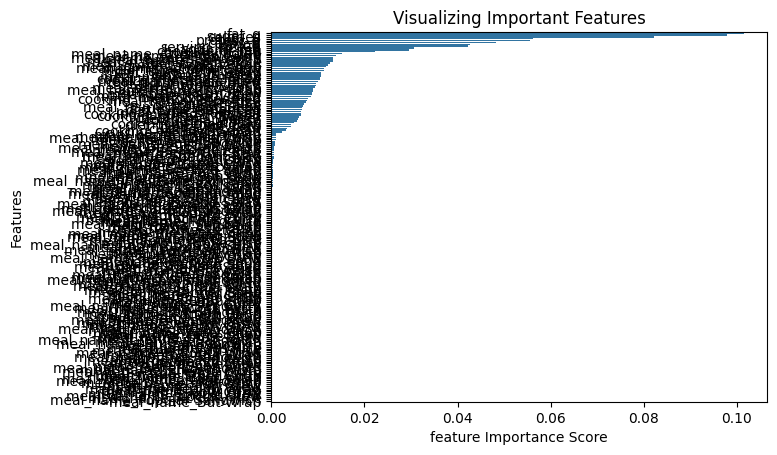

In [91]:
#visualizing the feature scores with a bar plot

#creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)


#Add labels to the graph

plt.xlabel("feature Importance Score")
plt.ylabel("Features")


#Adding title to the graph
plt.title("Visualizing Important Features")

#Visualize the graph
plt.show()

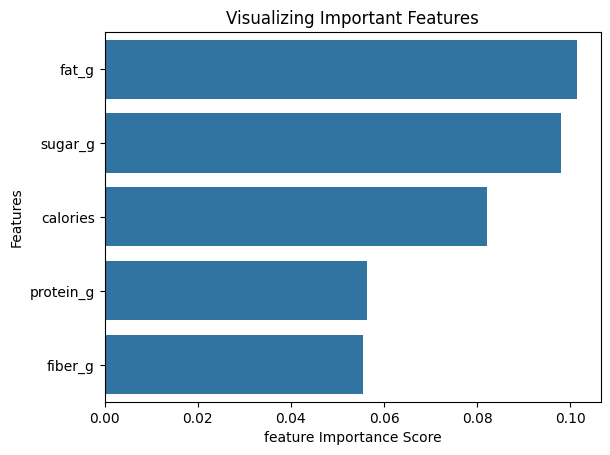

In [92]:
#For displaying the plot of the Important features only
filtered_scores = feature_scores[feature_scores > 0.05]
sns.barplot(x=filtered_scores,y=filtered_scores.index)

plt.xlabel("feature Importance Score")
plt.ylabel("Features")


#Adding title to the graph
plt.title("Visualizing Important Features")

#Visualize the graph
plt.show()


In [93]:
#Declare feature vector and target variable(for the least important feature to drop)

X = df.drop(["is_healthy","fiber_g"], axis=1)

y=df['is_healthy']

In [94]:
#Split data into training and testing sets

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)



In [97]:
#Again making the instance of model with 100 Decision Trees

rfc_100 = RandomForestClassifier(n_estimators=100, random_state = 0)

#fit the model to the training set
rfc_100.fit(X_train, y_train)

#predict the test set results
y_pred_100 = rfc_100.predict(X_test)


#Check accuracy score
print("Model accuracy score with 100 Decision Trees: {0:0.4f}".format(accuracy_score(y_test, y_pred_100 )))

Model accuracy score with 100 Decision Trees: 0.9157


In [99]:
#Confusion Matrix

#printing the Confusion Matrix and part it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix\n\n", cm)

Confusion matrix

 [[73  3]
 [ 7  0]]


In [ ]:
#Classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))